## Multiple Linear Regression

- one dependent variable and multiple independent variables
- y = b0+b1x1+b2x2+........+bnxn
- price of the house

## Steps using sklearn

- read data
- cleaning or analyzing
- Seperate the features and target
- Train/test  the data
- Select required model
- Fit our training data
- Predict the data usind testdata
- Compare actual and predicted data
- Evaluation metrices

In [2]:
#reading the data

import pandas as pd
df = pd.read_csv("fuelconsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df["MODELYEAR"].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [21]:
## Seperate the features and target

x = df[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]##considering them as the inputs
y = df["CO2EMISSIONS"]
##target variable or the dependent one
# heartdisease dataset can be used

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=25)
x_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
733,15.4,11.0,13.4
671,15.1,10.3,12.9
344,24.1,19.2,21.9
675,12.7,9.1,11.1
200,9.5,6.5,8.2
...,...,...,...
255,9.4,7.0,8.3
886,10.7,7.4,9.2
143,10.2,8.0,9.2
474,23.3,16.1,20.1


In [34]:
x_test.shape

(321, 3)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)

In [37]:
x_test

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
119,16.2,10.9,13.8
450,21.3,14.3,18.2
469,16.0,11.1,13.8
239,14.6,10.3,12.7
572,12.5,8.8,10.8
...,...,...,...
596,14.1,11.1,12.8
1005,17.6,12.9,15.5
853,9.1,8.5,8.8
28,13.1,8.8,11.2


In [38]:
model.predict([[8.9,6.8,8.0]])

array([195.73140052])

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)*100

79.7396580477286

In [40]:
mean_squared_error(y_test,y_pred)**0.5

28.44216546311447

In [41]:
model.intercept_

78.57272695721008

In [43]:
model.coef_

array([10.28873435, -8.99834343, 10.84720914])

## Polynomial Regression

- training data error - bias
- testing data error - variance

- underfitting - high bias, high variance order =1 (study time=0,syllabus=0,model=0)
- best fitting - low bias, low variance order = 2 (study time=1, syllabus=1,newq=)
- over fitting - low bias, high variance order = 3 (study time=1, syllabus=1,newq=)

In [44]:
df1 = pd.read_csv("chinagdp.csv")
df1.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [45]:
df1.shape

(55, 2)

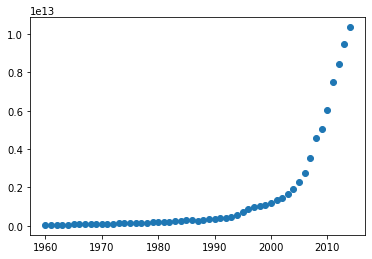

In [47]:
import matplotlib.pyplot as plt
plt.scatter(df1["Year"],df1["Value"])
plt.show()

In [63]:
x = df1["Year"].values.reshape(-1,1)
y = df1["Value"].values.reshape(-1,1)

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [65]:
y_pred = model.predict(x_poly)

In [66]:
r2_score(y,y_pred)*100

96.45101047000898

In [67]:
mean_squared_error(y,y_pred)

2.177936487194082e+23

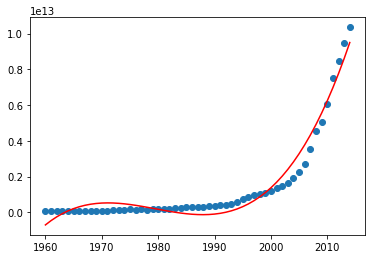

In [70]:
plt.scatter(df1["Year"],df1["Value"])
plt.plot(x,y_pred,color = "red")
plt.show()

In [72]:
acc = []
for i in range(2,20):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly,y)
    y_pred = model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)

In [73]:
acc

[84.24443474171446,
 96.45101047000898,
 96.5120230215125,
 96.57218086535269,
 96.63149021194226,
 96.68995728675763,
 96.74758835356721,
 96.80438971170584,
 96.86036769344585,
 96.9155286654676,
 96.96987902292203,
 97.02342519173827,
 97.07617362685119,
 97.12813080732198,
 97.17930323901378,
 97.22969745112273,
 97.27931999533536,
 97.32817744349673]

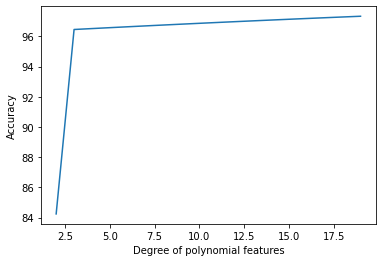

In [74]:
import numpy as np
plt.plot(np.arange(2,20),acc)
plt.xlabel("Degree of polynomial features")
plt.ylabel("Accuracy")
plt.show()